In [1]:
import sys

sys.path.append('..')

import numpy as np

from single_inference import single_inference as single
from hydroml import plot as plt
from hydroml import dataset as ds
from hydroml import trim


In [2]:
net_Baryons_19 = np.fromfile('../datasets/training/NetbaryonDis_OSG3DAuAu19.6_tune18.3_wBulk_22momdeltaf_netBaryon.dat', dtype=np.float32)
net_Protons_19 = np.fromfile('../datasets/training/NetbaryonDis_OSG3DAuAu19.6_tune18.3_wBulk_22momdeltaf_netProton.dat', dtype=np.float32)

dataset = ds.TrainDataset(net_Baryons_19, net_Protons_19, 141)

In [3]:
# Low centrality collisions will not generate good outputs as the net proton rapidity 
# is generally less structures compared to higher centralities.
index = 560

input, expected_output = dataset[index]
output = single(input, "../models/baryon_model_19.6gev.pt")
eta = dataset.eta

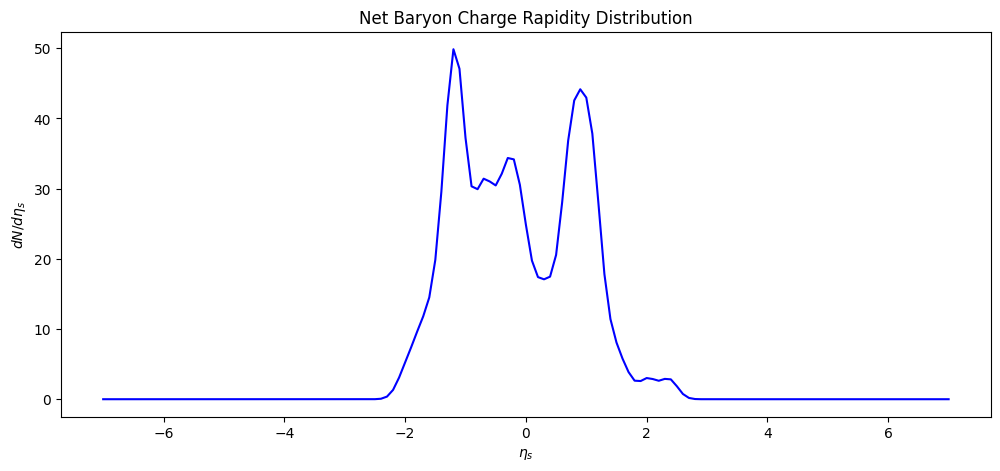

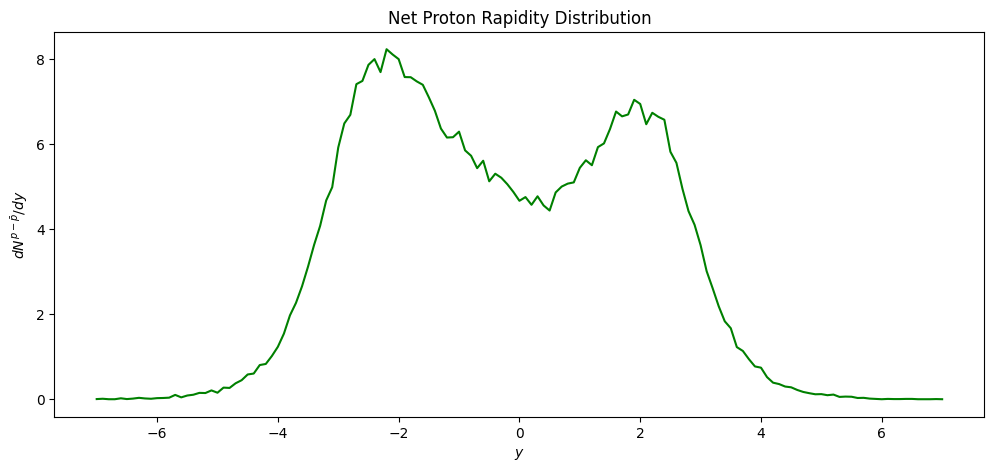

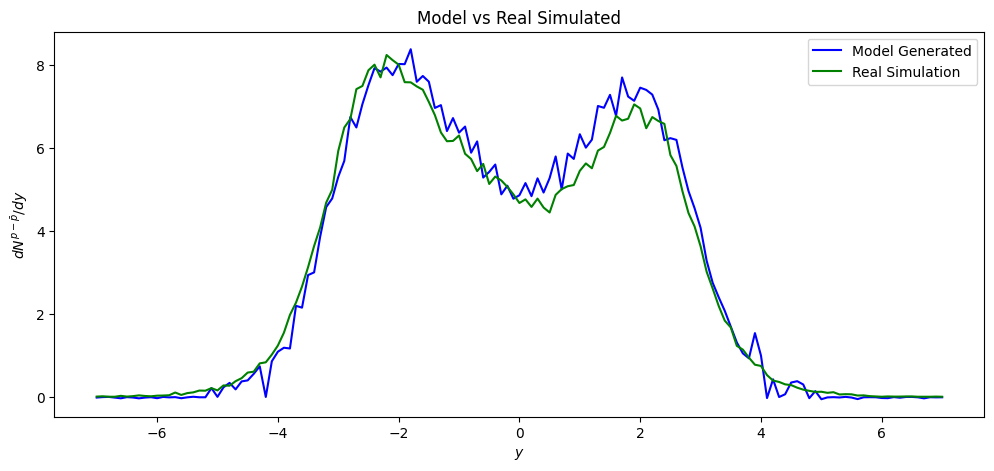

Real: 23.428728103637695
Model: 25.11553955078125


In [4]:
plt.plot_output(eta, input, expected_output)
plt.plot_output_compare(eta, output, expected_output)

#Integrals
bound_1 = -2.0
bound_2 = 2.0

eta_trim, protons_real_trim = trim.trim( dataset.eta, expected_output, bound_1, bound_2  )
_, protons_model_trim = trim.trim( dataset.eta, output, bound_1, bound_2  )

print(f'Real: {np.trapz( protons_real_trim, x=eta_trim)}')
print(f'Model: {np.trapz( protons_model_trim, x=eta_trim)}')